<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/Example_Clouding_Atlassian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clouding Atlassian Architecture Example

How to guide can be found in the read me. 

In [1]:
#@title Install Diagrams
import os
result = os.system('pip install diagrams')

In [2]:
#@markdown ## Get Repository
from urllib import request

baseUrl = "https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/"
[name, response] = request.urlretrieve(baseUrl + 'CloudingRepository/CloudingAtlassianRepository.py', '_CloudingAtlassianRepository.py')

In [3]:
#@markdown ## Settings

default_settings = {
  "show": False,
  "outformat": "png",
  "graph_attr":  {
    "splines": "spline",
    "fontsize": "10",
    "bgcolor": "lightgrey"
  },
  "node_attr": {
    "fontsize": "8px",
    "width": "1.8"
  }
} 

In [4]:
#@markdown ## Print Repository
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

Personas.Print()
InternalSystems.Print()
ExternalSystems.Print()

---

## ExternalUser

| Key         | Value       |
                   | ----------- | ----------- |
| id | ExternalUser |
| nodeType | Person |
| name | External Users |
| description | Several lines of text, with some "quotes" of various 'types',
and also a blank line: and some text with
extra indentation on the next line, plus another line at the end. |

---

## InternalUser

| Key         | Value       |
                   | ----------- | ----------- |
| id | InternalUser |
| nodeType | Person |
| name | Internal Users |
| description | Several lines of text |

---

## RemoteUser

| Key         | Value       |
                   | ----------- | ----------- |
| id | RemoteUser |
| nodeType | Person |
| name | Remote Users |
| description | Several lines of text |

---

## ActiveDirectory

| Key         | Value       |
                   | ----------- | ----------- |
| id | ActiveDirectory |
| nodeType | Custom |
| name | Active Directory |
| description | Active Directory |
| technology | Microsoft Active Directory |
| icon | https://www.outsystems.com/Forge_CW/_image.aspx/Q8LvY--6WakOw9afDCuuGXsjTvpZCo5fbFxdpi8oIBI=/active-directory-core-simplified-2023-01-04%2000-00-00-2023-05-05%2011-44-13 |

---

## Bamboo

| Key         | Value       |
                   | ----------- | ----------- |
| id | Bamboo |
| nodeType | Container |
| name | Bamboo (Server) |
| description | Bamboo |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/126/46/png-transparent-bamboo-atlassian-continuous-integration-jira-confluence-vision-blue-text-trademark.png |
| label | Bamboo (Server)
Container Linux
bamboo.internal.server.com.au
192.168.61.150 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## BitBucket

| Key         | Value       |
                   | ----------- | ----------- |
| id | BitBucket |
| nodeType | Container |
| name | BitBucket (Server) |
| description | BitBucket |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/126/46/png-transparent-bitbucket-atlassian-continuous-integration-jira-confluence-vision-blue-text-trademark.png |
| label | BitBucket (Server)
Container Linux
bitbucket.internal.server.com.au
192.168.61.350 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## Citrix

| Key         | Value       |
                   | ----------- | ----------- |
| id | Citrix |
| nodeType | Custom |
| name | Citrix |
| description | Citrix |
| icon | https://Citrix.icon |

---

## Confluence

| Key         | Value       |
                   | ----------- | ----------- |
| id | Confluence |
| nodeType | Container |
| name | Confluence (Server) |
| description | Confluence |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-confluence-atlassian-logo-jira-sharepoint-confluence-health-mares-building-text-logo-area.png |
| label | Bamboo (Server)
Container Linux
confluence.internal.server.com.au
192.168.110.100 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## ConfluenceNonProd

| Key         | Value       |
                   | ----------- | ----------- |
| id | ConfluenceNonProd |
| nodeType | Container |
| name | Confluence (Server) (Non-Production) |
| description | Confluence Non-Production |
| technology | Linux |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-confluence-atlassian-logo-jira-sharepoint-confluence-health-mares-building-text-logo-area.png |
| label | Bamboo (Server)
Container Linux
confluence-dev.internal.server.com.au
192.168.110.200 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## Disc

| Key         | Value       |
                   | ----------- | ----------- |
| id | Disc |
| nodeType | Custom |
| name | Disc |
| description | Several lines of text |
| technology | IBMi |
| icon | https://w7.pngwing.com/pngs/1/875/png-transparent-as400-ibm.png |

---

## GitLab

| Key         | Value       |
                   | ----------- | ----------- |
| id | GitLab |
| nodeType | Custom |
| name | GitLab |
| description | GitLab |
| icon | https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/Repository/Internal%20Systems/GitLab.png |

---

## GlobalProtect

| Key         | Value       |
                   | ----------- | ----------- |
| id | GlobalProtect |
| nodeType | Custom |
| name | GlobalProtect |
| description | GlobalProtect |
| icon | https://GlobalProtect.icon |

---

## Intranet

| Key         | Value       |
                   | ----------- | ----------- |
| id | Intranet |
| nodeType | System |
| name | Intranet |
| description | The Hub |
| notes | Part of the on-prem confluence implementation,
to be migrated not a new system. |

---

## Jenkins

| Key         | Value       |
                   | ----------- | ----------- |
| id | Jenkins |
| nodeType | Custom |
| name | Jenkins |
| description | Jenkins |
| technology | Jenkins |
| icon | https://Jenkins.icon |

---

## Jira

| Key         | Value       |
                   | ----------- | ----------- |
| id | Jira |
| nodeType | Container |
| name | Jira (Server) |
| description | Jira |
| technology | Linux |
| icon | None |
| label | Bamboo (Server)
Container Linux
jira.internal.server.com.au
192.168.110.100 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## JiraNonProd

| Key         | Value       |
                   | ----------- | ----------- |
| id | JiraNonProd |
| nodeType | Container |
| name | Jira (Server) (Non-Production) |
| description | Jira Non-Production |
| technology | Linux |
| icon | None |
| label | Bamboo (Server)
Container Linux
jira-dev.internal.server.com.au
192.168.110.200 |
| CPU | None |
| RAM | None |
| Storage | 124.5GB |
| Type | V |
| OS | Linux |
| Network Zone | None |
| Application Version | 8.13.2 |

---

## Okta

| Key         | Value       |
                   | ----------- | ----------- |
| id | Okta |
| nodeType | Custom |
| name | Okta |
| description | Okta |
| icon | https://Okta.icon |

---

## PowerBi

| Key         | Value       |
                   | ----------- | ----------- |
| id | PowerBi |
| nodeType | Custom |
| name | PowerBi |
| description | PowerBi |
| technology | PowerBi |
| icon | https://www.clipartmax.com/png/middle/16-161548_power-bi-logo-microsoft-vector-eps-free-download-icons-power-bi-logo.png |

---

## ServiceNow

| Key         | Value       |
                   | ----------- | ----------- |
| id | ServiceNow |
| nodeType | Custom |
| name | ServiceNow |
| description | ServiceNow |
| icon | https://servicenow.icon |

---

## ConfluenceCloud

| Key         | Value       |
                   | ----------- | ----------- |
| id | ConfluenceCloud |
| nodeType | Custom |
| name | Confluence (Cloud) |
| description | Confluence |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-confluence-atlassian-logo-jira-sharepoint-confluence-health-mares-building-text-logo-area.png |

---

## JiraCloud

| Key         | Value       |
                   | ----------- | ----------- |
| id | JiraCloud |
| nodeType | Custom |
| name | Jira (Cloud) |
| description | Jira |
| icon | https://w7.pngwing.com/pngs/282/343/png-transparent-jira-atlassian-logo-jira-sharepoint-jira-health-mares-building-text-logo-area.png |

---

## NewRelic

| Key         | Value       |
                   | ----------- | ----------- |
| id | NewRelic |
| nodeType | Custom |
| name | NewRelic |
| description | NewRelic |
| icon | https://newrelic.com/themes/custom/erno/assets/mediakit/new_relic_logo_vertical.png |

# Diagrams

## Current State Atlassian Suite Context Diagram

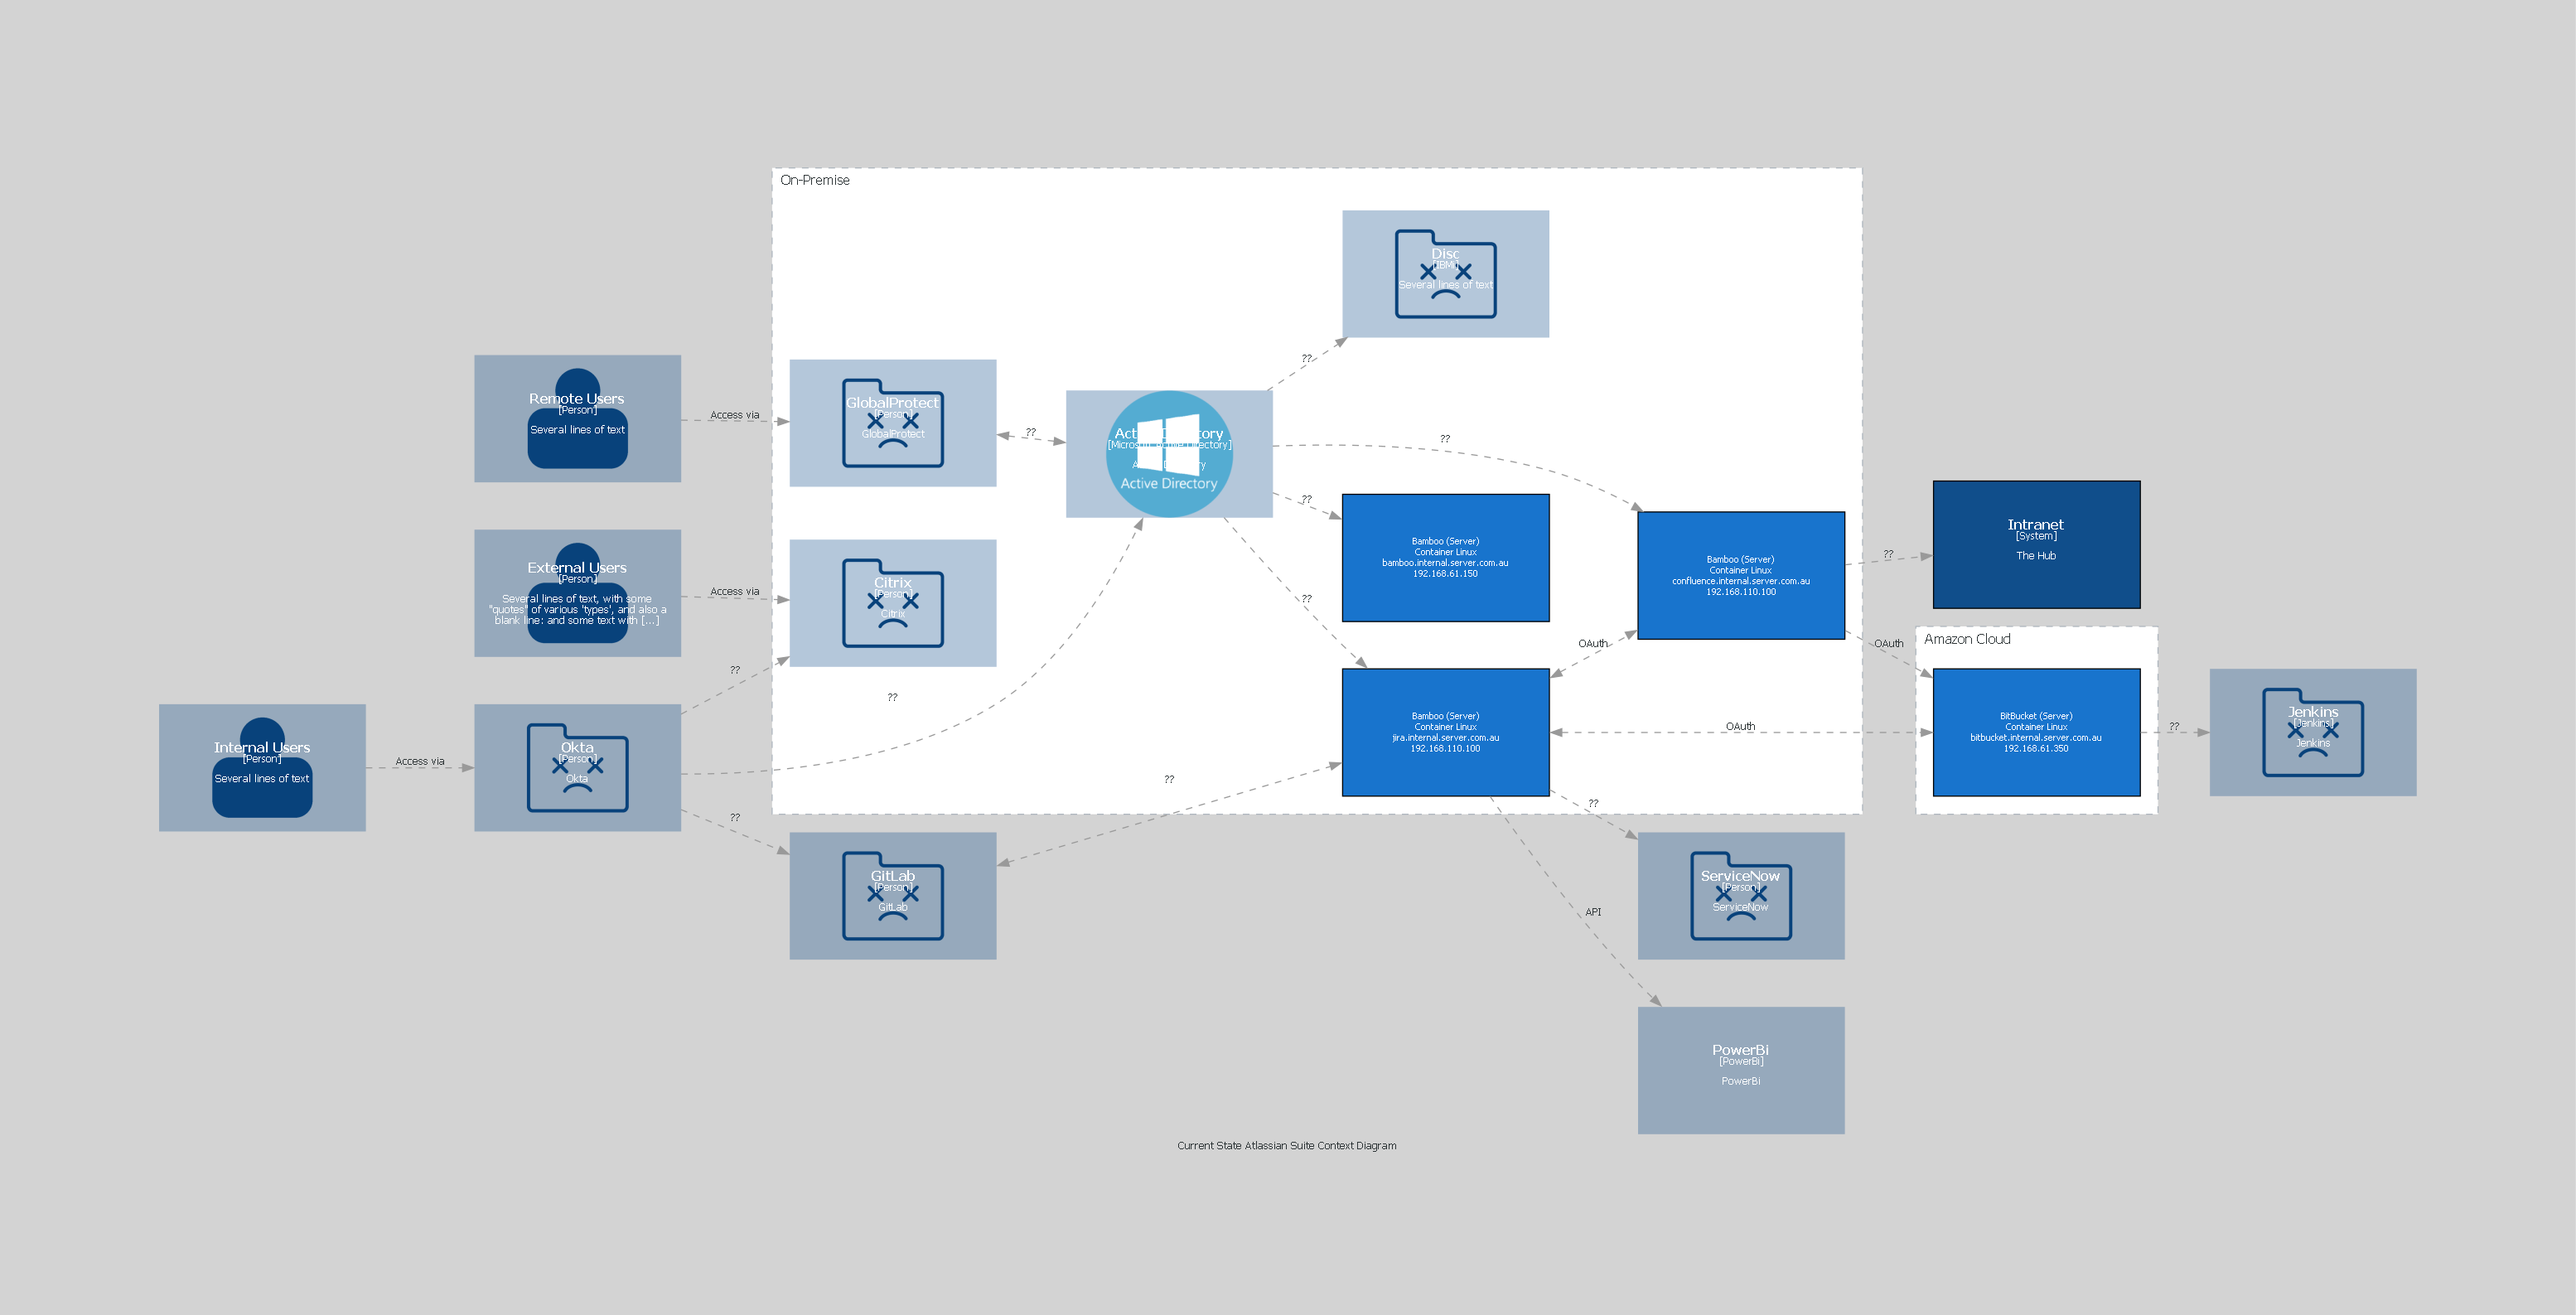

In [5]:
#@title Current State Definition
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

settings = { **default_settings, **{
  "name": "Current State Atlassian Suite Context Diagram"
}}

with Diagram(** settings) as diagram:
  internalUsers = Personas.InternalUser.Get()
  remoteUsers = Personas.RemoteUser.Get()
  externalUsers = Personas.ExternalUser.Get()

  with SystemBoundary("On-Premise"):
    activeDirectory = InternalSystems.ActiveDirectory.Get()
    globalProtect = InternalSystems.GlobalProtect.Get()
    bamboo = InternalSystems.Bamboo.Get()
    confluence = InternalSystems.Confluence.Get()
    jira = InternalSystems.Jira.Get()
    disc = InternalSystems.Disc.Get()
    citrix = InternalSystems.Citrix.Get()

  with SystemBoundary("Amazon Cloud"):
    bitBucket = InternalSystems.BitBucket.Get()

  jenkins = InternalSystems.Jenkins.Get()
  serviceNow = InternalSystems.ServiceNow.Get()
  powerBi = InternalSystems.PowerBi.Get()
  intranet = InternalSystems.Intranet.Get()
  okta = InternalSystems.Okta.Get()
  gitLab = InternalSystems.GitLab.Get()

  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]
  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]
  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << [jira]
  jira >> Relationship("OAuth") << [bitBucket, confluence]
  globalProtect >> Relationship("??") << [activeDirectory]
  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]
  confluence >> Relationship("??") >> [intranet]
  confluence >> Relationship("OAuth") >> [bitBucket]
  jira >> Relationship("API") >> [powerBi]
  bitBucket >> Relationship("??") >> [jenkins]

display(Markdown("## " + settings["name"]))
display(diagram)

## Transition State Atlassian Suite Context Diagram

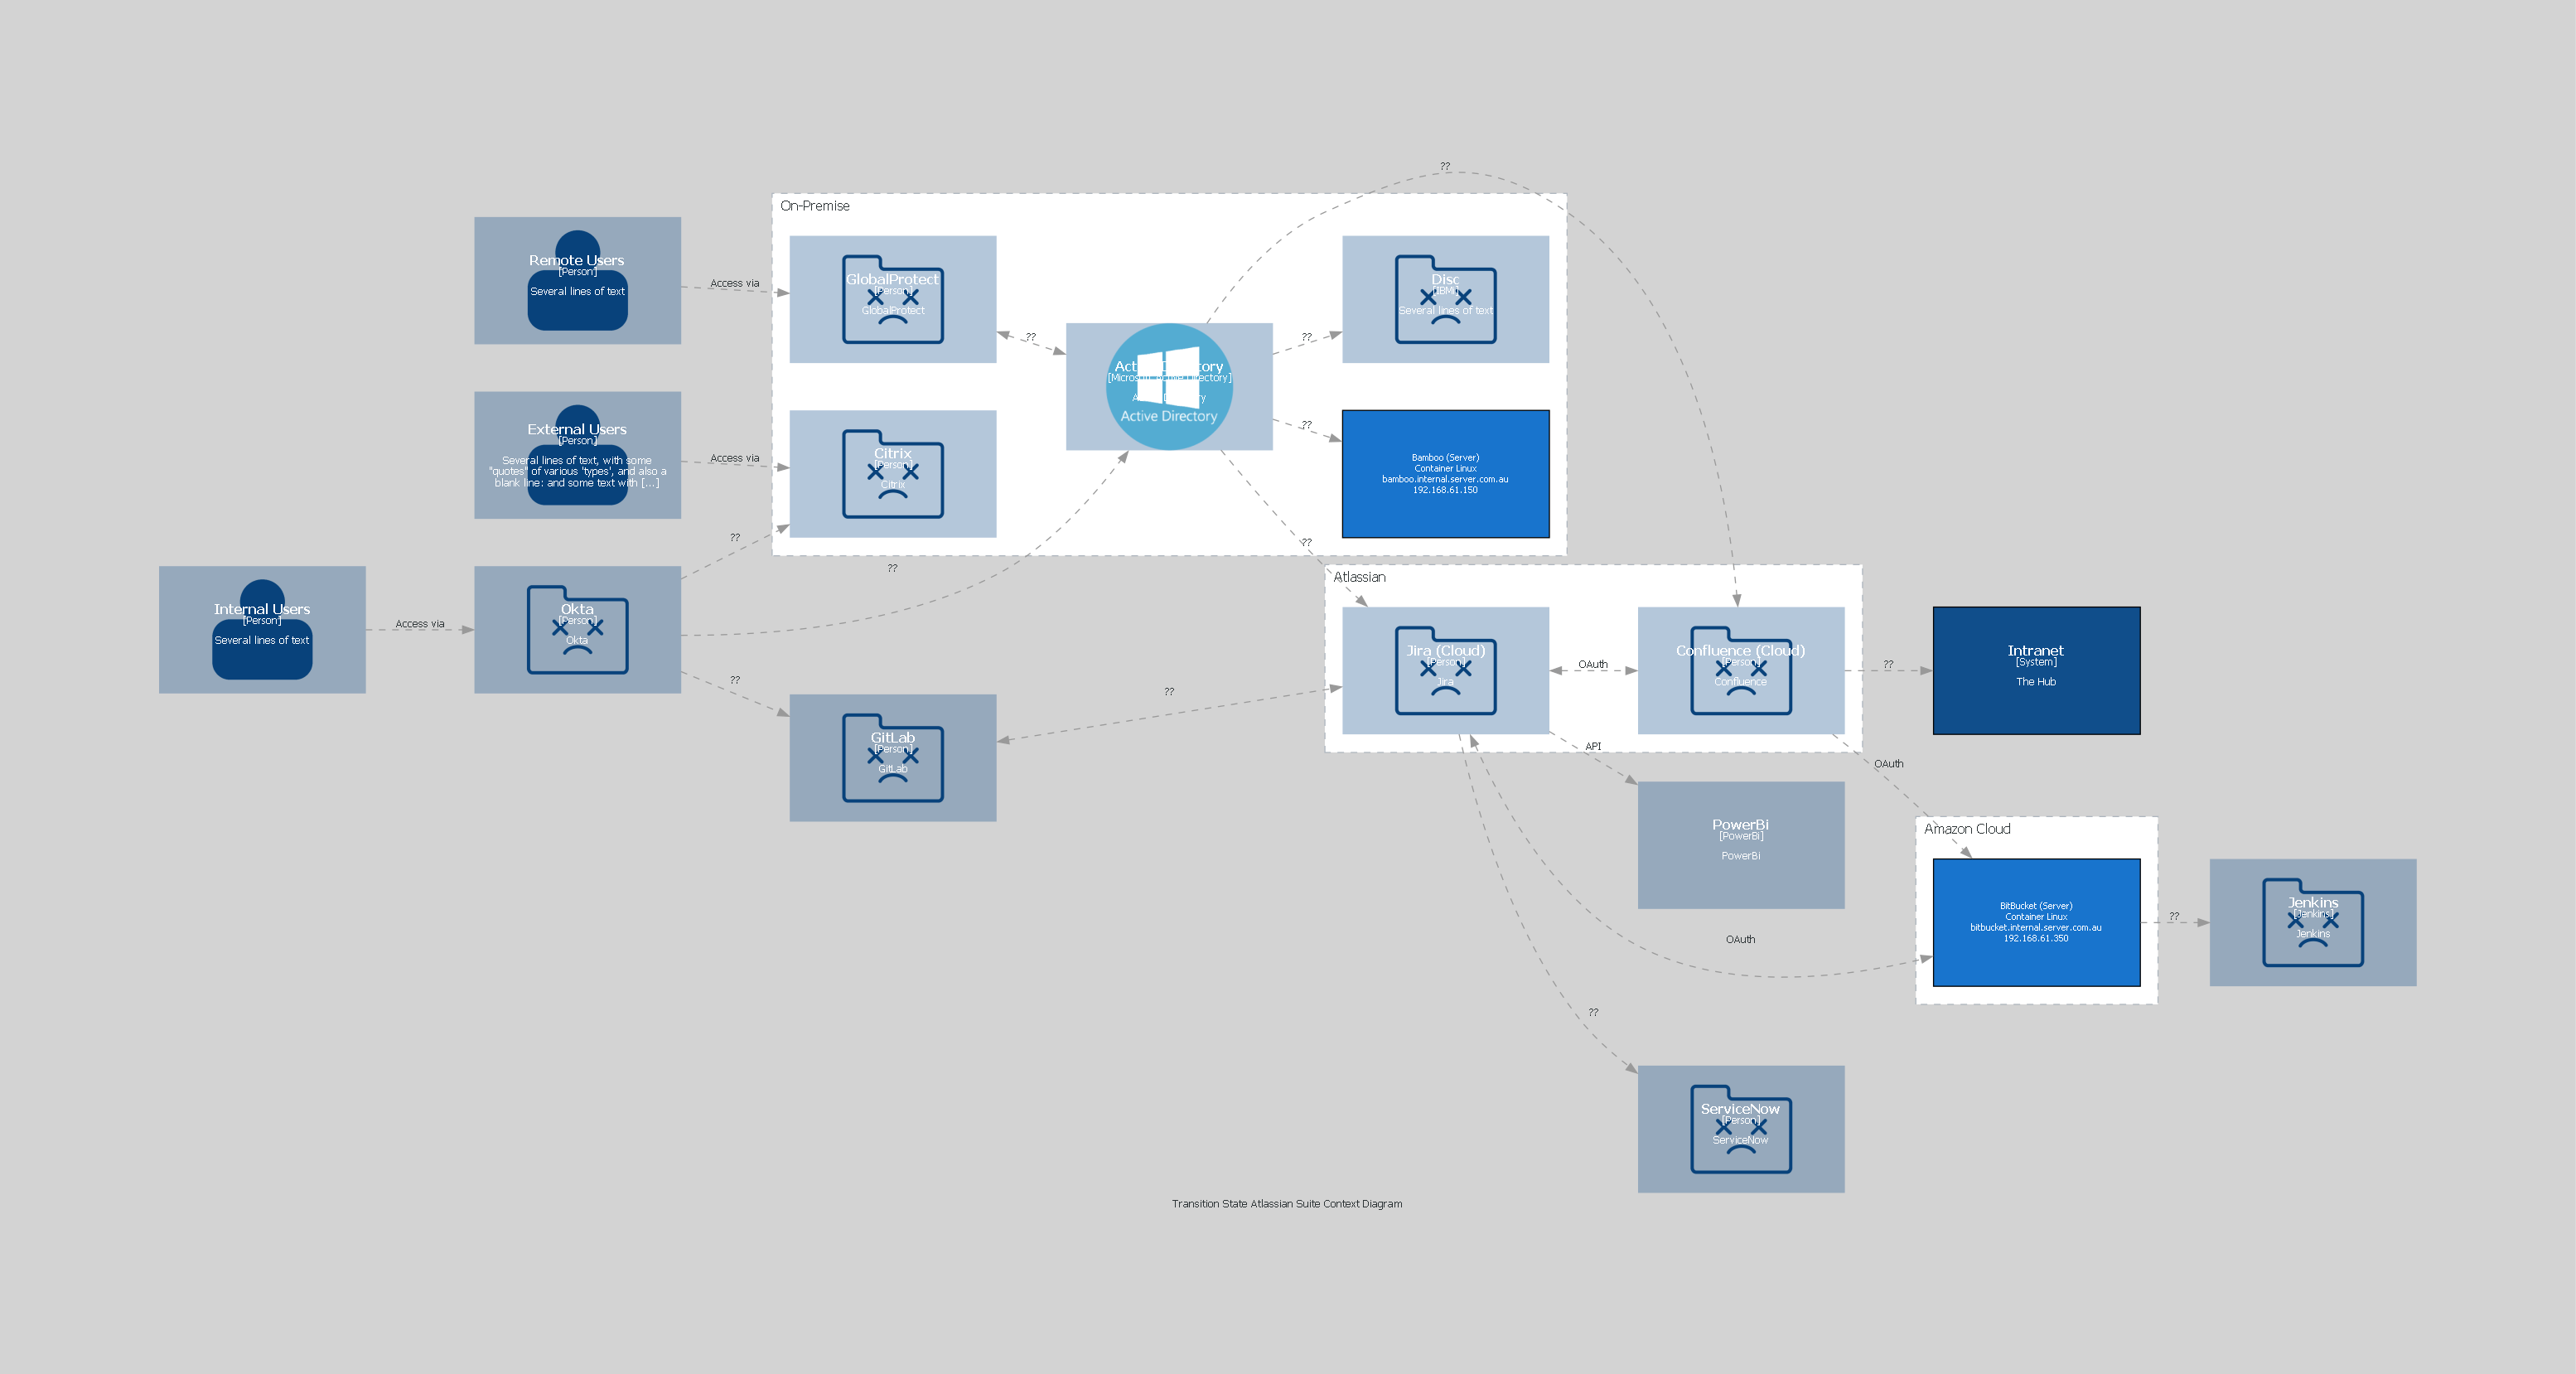

In [6]:
#@title Transition State Definition
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship 
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

settings = { **default_settings, **{
  "name": "Transition State Atlassian Suite Context Diagram"
}}

with Diagram(** settings) as diagram:
  
  internalUsers = Personas.InternalUser.Get()
  remoteUsers = Personas.RemoteUser.Get()
  externalUsers = Personas.ExternalUser.Get()

  with SystemBoundary("On-Premise"):
    activeDirectory = InternalSystems.ActiveDirectory.Get()
    globalProtect = InternalSystems.GlobalProtect.Get()
    bamboo = InternalSystems.Bamboo.Get()
    disc = InternalSystems.Disc.Get()
    citrix = InternalSystems.Citrix.Get()

  with SystemBoundary("Amazon Cloud"):
    bitBucket = InternalSystems.BitBucket.Get()

  with SystemBoundary("Atlassian"):
    confluence = ExternalSystems.ConfluenceCloud.Get()
    jira = ExternalSystems.JiraCloud.Get()

  jenkins = InternalSystems.Jenkins.Get()
  serviceNow = InternalSystems.ServiceNow.Get()
  powerBi = InternalSystems.PowerBi.Get()
  internet = InternalSystems.Intranet.Get()
  okta = InternalSystems.Okta.Get()
  gitLab = InternalSystems.GitLab.Get()

  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]
  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]
  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << [jira]
  jira >> Relationship("OAuth") << [bitBucket, confluence]
  globalProtect >> Relationship("??") << [activeDirectory]
  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]
  confluence >> Relationship("??") >> [internet]
  confluence >> Relationship("OAuth") >> [bitBucket]
  jira >> Relationship("API") >> [powerBi]
  bitBucket >> Relationship("??") >> [jenkins]

display(Markdown("## " + settings["name"]))
display(diagram)

## Future State Atlassian Suite Context Diagram

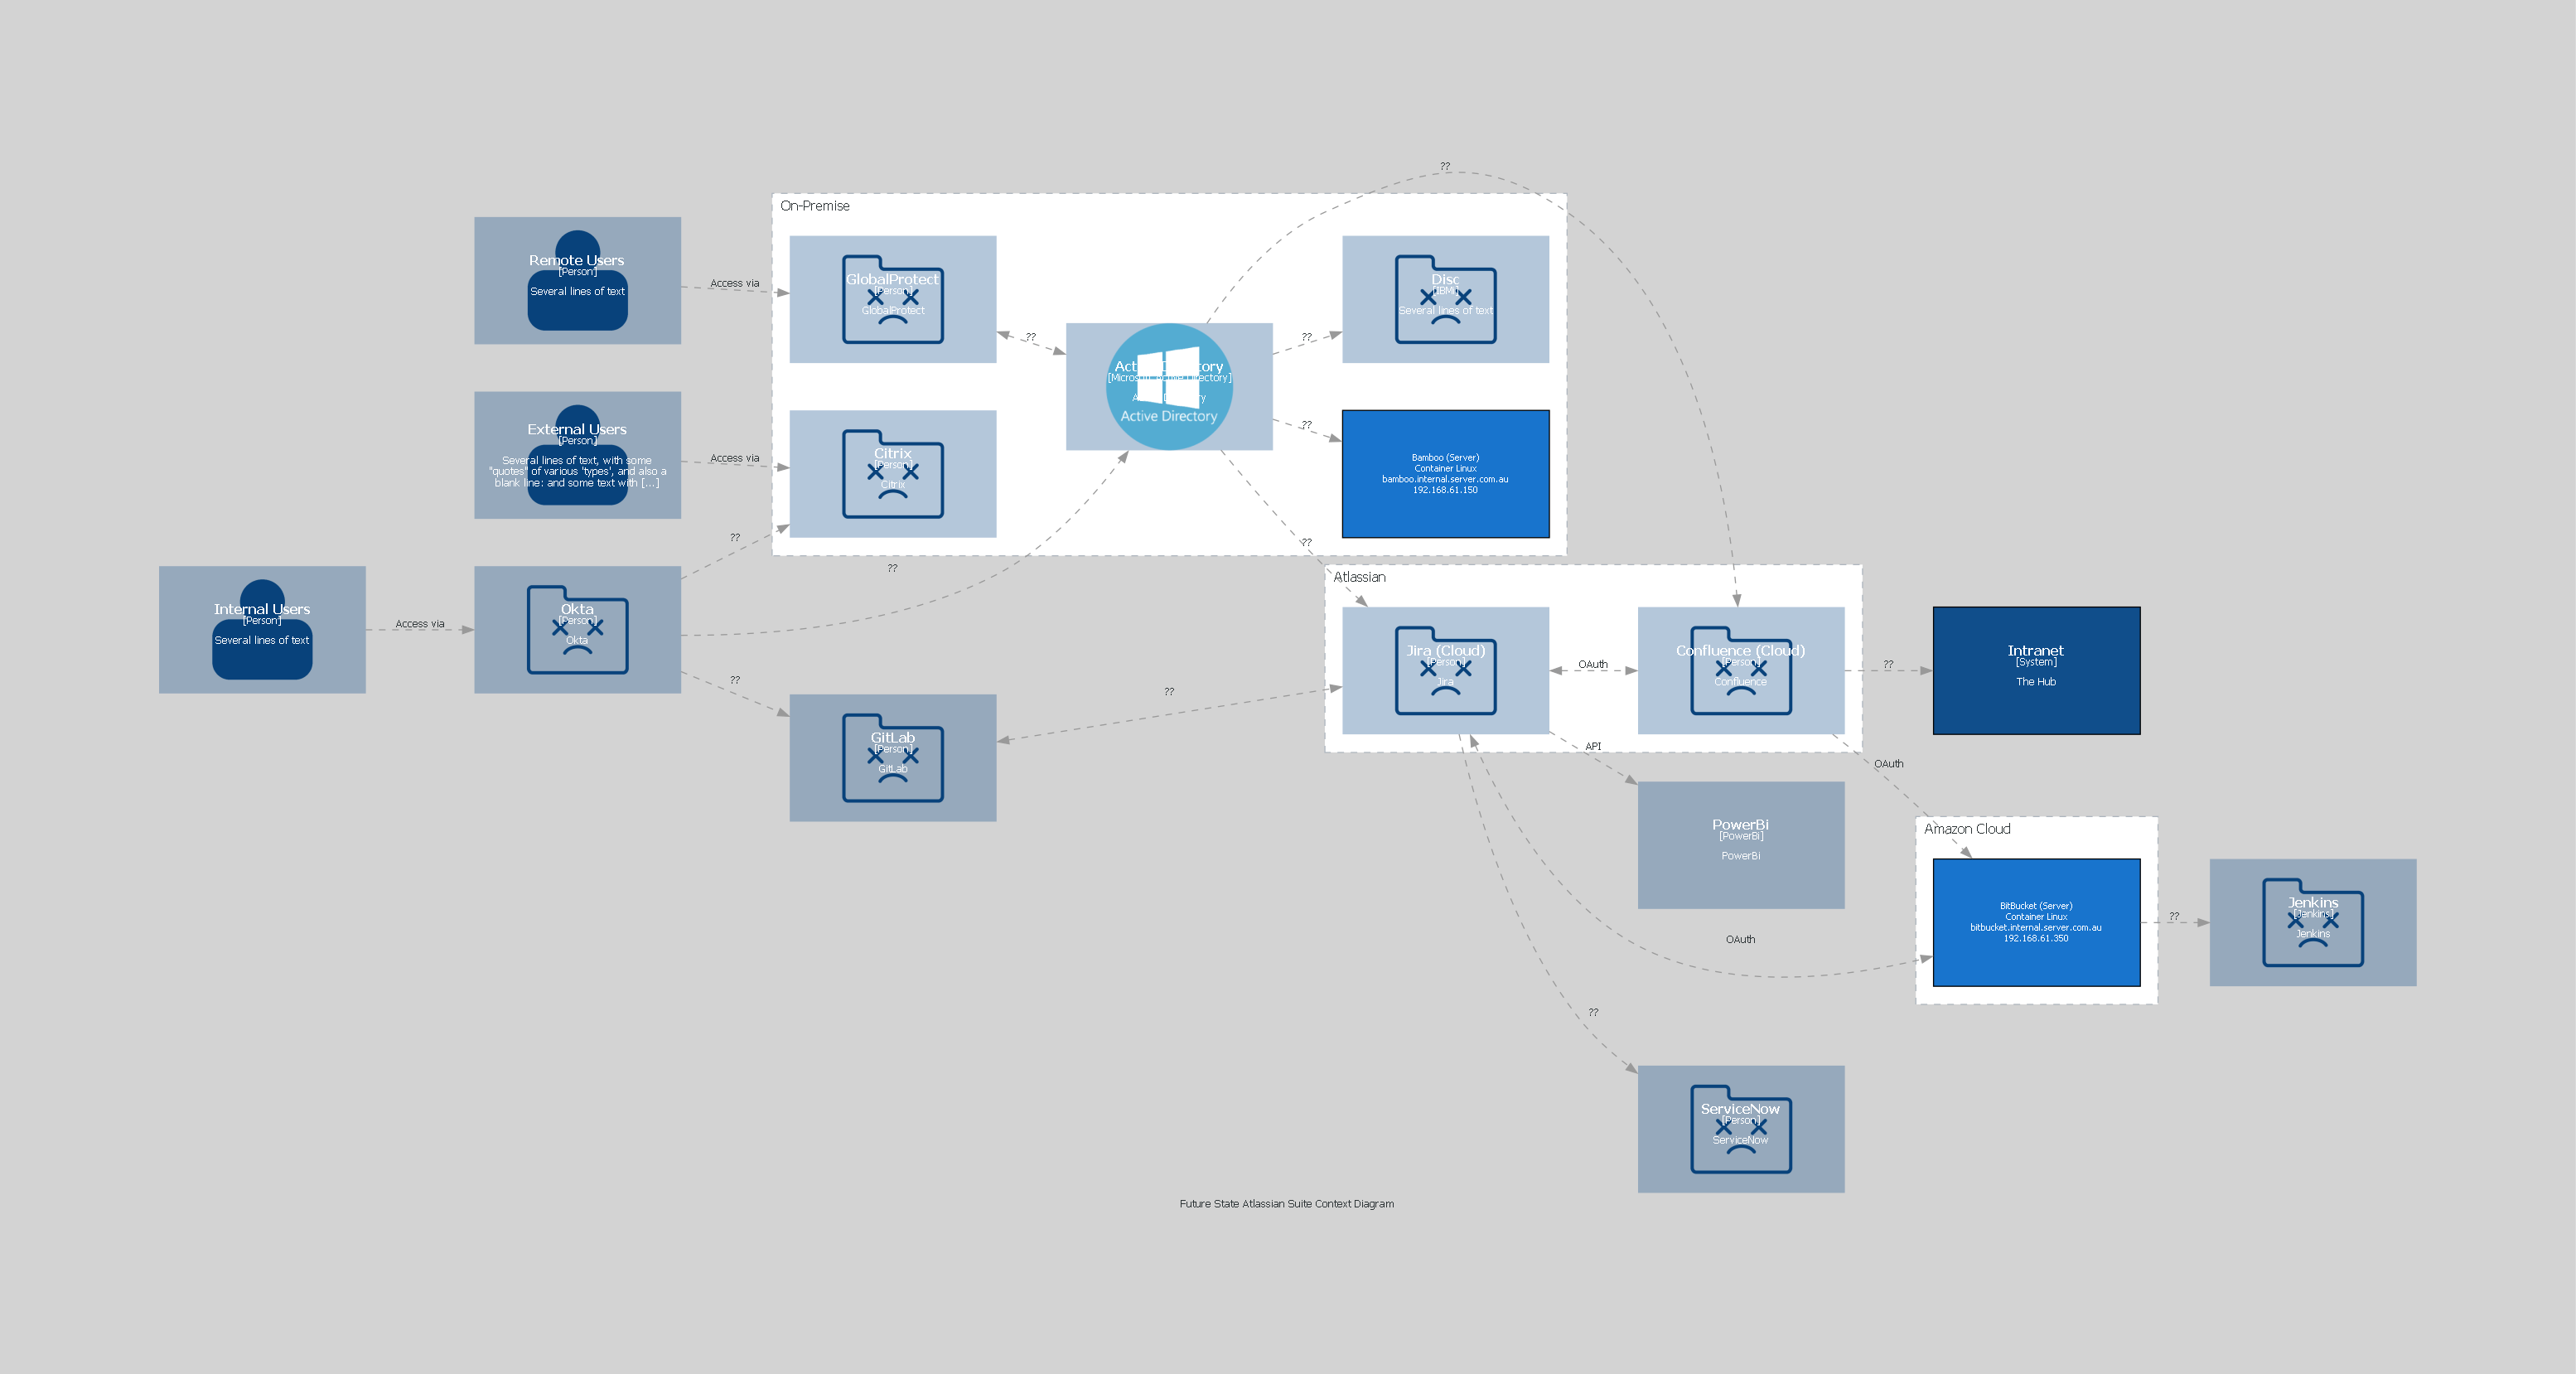

In [7]:
#@title Future State Definition
from IPython.display import display, Markdown
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship
from _CloudingAtlassianRepository import Personas, InternalSystems, ExternalSystems

settings = { **default_settings, **{
  "name": "Future State Atlassian Suite Context Diagram"
}}

with Diagram(** settings) as diagram:
  
  internalUsers = Personas.InternalUser.Get()
  remoteUsers = Personas.RemoteUser.Get()
  externalUsers = Personas.ExternalUser.Get()

  with SystemBoundary("On-Premise"):
    activeDirectory = InternalSystems.ActiveDirectory.Get()
    globalProtect = InternalSystems.GlobalProtect.Get()
    bamboo = InternalSystems.Bamboo.Get()
    disc = InternalSystems.Disc.Get()
    citrix = InternalSystems.Citrix.Get()

  with SystemBoundary("Amazon Cloud"):
    bitBucket = InternalSystems.BitBucket.Get()

  with SystemBoundary("Atlassian"):
    confluence = ExternalSystems.ConfluenceCloud.Get()
    jira = ExternalSystems.JiraCloud.Get()

  jenkins = InternalSystems.Jenkins.Get()
  serviceNow = InternalSystems.ServiceNow.Get()
  powerBi = InternalSystems.PowerBi.Get()
  intranet = InternalSystems.Intranet.Get()
  okta = InternalSystems.Okta.Get()
  gitLab = InternalSystems.GitLab.Get()

  internalUsers >> Relationship("Access via") >> [okta]
  remoteUsers >> Relationship("Access via") >> [globalProtect]
  externalUsers >> Relationship("Access via") >> [citrix]
  okta >> Relationship("??") >> [gitLab, activeDirectory, citrix]
  jira >> Relationship("??") >> [serviceNow]
  gitLab >> Relationship("??") << [jira]
  jira >> Relationship("OAuth") << [bitBucket, confluence]
  globalProtect >> Relationship("??") << [activeDirectory]
  activeDirectory >> Relationship("??") >> [jira, confluence, bamboo, disc]
  confluence >> Relationship("??") >> [intranet]
  confluence >> Relationship("OAuth") >> [bitBucket]
  jira >> Relationship("API") >> [powerBi]
  bitBucket >> Relationship("??") >> [jenkins]

display(Markdown("## " + settings["name"]))
display(diagram)
